XGBoost Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1

    accuracy                           0.71         7
   macro avg       0.53      0.56      0.52         7
weighted avg       0.69      0.71      0.66         7



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


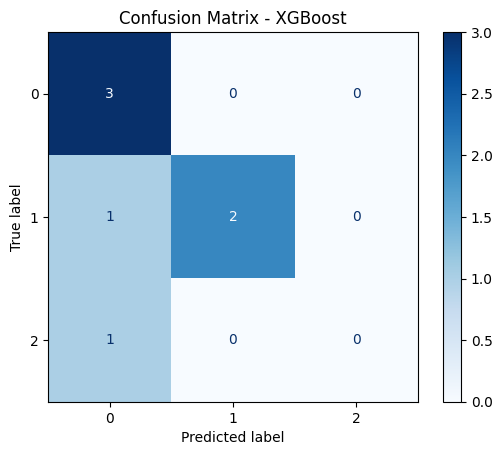

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# ---- Step 1: Dataset with manual labels ----
data = {
    "No": list(range(1, 33)),
    "Name": [
        "FARHIN","URMI","FIHA","MISTY","TITHI","FAHIMA","NAIMUR","HAMEEM",
        "RIJON","SANI","SUMU","ARPA","RADIBA","AISHI","NAZIA","FIFI","SHAHRIN",
        "RAHMAN","SHANNI","SADIA","NAHID","ARIYAN","SABIA","SHAKIA","NAFISA",
        "SULTANA","EUSHA","MEHNAZ","OISHI","SADEK","WAHID","TORY"
    ],
    "Accuracy": [
        98.1,100,90.1,97.0,93.1,95.4,98.5,97.5,97.8,94.9,90.7,100,98.1,34.3,99.1,
        98.9,99.1,99.3,97.8,97.6,96.7,98.7,98.1,97.4,100,97.8,100,100,99.4,97.6,
        99.2,99.3
    ],
    "ReactionTime": [
        1.71,1.64,1.99,1.81,1.81,1.68,1.37,1.49,0.97,1.52,1.53,1.77,3.34,1.68,
        1.66,1.97,1.69,1.29,1.01,1.47,0.93,1.15,3.34,2.36,1.58,1.34,1.44,1.72,
        1.09,1.08,1.52,1.36
    ],
    "Label": [
        1,1,2,1,2,1,0,0,0,2,2,1,2,2,1,1,1,0,0,0,0,0,2,2,1,0,0,1,0,0,1,0
    ]  # Manual labels
}

df = pd.DataFrame(data)

# ---- Step 2: Preprocess ----
X = df[["Accuracy", "ReactionTime"]]
y = df["Label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Step 3: Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---- Step 4: Train XGBoost Classifier ----
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    eval_metric="mlogloss"  # for multi-class classification
)
xgb_model.fit(X_train, y_train)

# ---- Step 5: Predictions ----
y_pred = xgb_model.predict(X_test)

# ---- Step 6: Evaluation ----
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---- Step 7: Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()
